 # <font color=red>Python分析調查數據
-----
StackOverflow是一個程式設計領域的交流網站，那邊有多大型且完整的調查數據，且皆為公開。從中也發現了一些很適合做專題的數據來試著作業
。這個網站會用問卷的方式來蒐集資料，以利作成公開的數據，以下是我下載到CSV檔案的位址 : [開發人員調查結果數據](https://insights.stackoverflow.com/survey) 。

 ## <font color=red>匯入檔案及模組
-----


In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.font_manager as fm 

#視覺化中文基本設定 
plt.rcParams["font.family"]="Microsoft YaHei"
plt.rcParams["font.size"]=12
#2只適用於指定地方的中文設定
#-----字體路徑-----
font_path="C:\Windows\Fonts\kaiu.ttf"
#-----建立字體物件------
font_prop=fm.FontProperties(fname=font_path) 
#-----設定字體內容-----
font_prop.set_style("normal")
font_prop.set_size("12")

In [2]:
#觀察數據
df = pd.read_csv('survey_results_public.csv')
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(88883, 85)

88,883 row 和 85 col。
表示有85個問題，而有88883回答了這些問題。接著我們可以開始去分析自己感興趣的事情了！

 ## <font color=red>從單純的資料開始看起
-----

In [4]:
df['BetterLife'].value_counts()

Yes    54938
No     31331
Name: BetterLife, dtype: int64

這份資料是在問說，是覺得今天出生的人會比他們的父母過上更好的生活嗎？也就是我們這一代對於下一代的預測。

In [5]:
df['BetterLife'].value_counts(normalize=True)

Yes    0.636822
No     0.363178
Name: BetterLife, dtype: float64

約有63%的人認為下一代會有更好的生活。

 ## <font color=red>篩選分類
-----

來試著做看看BetterLife和各年齡層之間的關係。

首先將回答為Yes和No的兩種資料分開來，

In [6]:
said_no = df[df['BetterLife'] == 'No']
said_yes = df[df['BetterLife'] == 'Yes']

可以利用.shape來和df['BetterLife'].value_counts()進行比較，確定分類是正確。

In [7]:
print(said_yes.shape)
print(said_no.shape)

(54938, 85)
(31331, 85)


In [8]:
df['BetterLife'].value_counts()

Yes    54938
No     31331
Name: BetterLife, dtype: int64

將年齡進行分類

In [9]:
under25 = df[df['Age'] <= 25]
age25_50 = df[(df['Age'] < 50) & (df['Age'] > 25)]
over50 = df[df['Age'] >= 50]

In [10]:
print('25歲以下:')
print(under25['BetterLife'].value_counts(normalize=True))
print('25~50歲:')
print(age25_50['BetterLife'].value_counts(normalize=True))
print('50歲以上:')
print(over50['BetterLife'].value_counts(normalize=True))


25歲以下:
Yes    0.704308
No     0.295692
Name: BetterLife, dtype: float64
25~50歲:
Yes    0.612461
No     0.387539
Name: BetterLife, dtype: float64
50歲以上:
No     0.514675
Yes    0.485325
Name: BetterLife, dtype: float64


可以發現越年輕BetterLife為Yes的比例越高

 ## <font color=red>更具體的篩選分類
   
-----

可以用&和&~來新增分類條件。

In [11]:
mask = df[(df['BetterLife'] == 'Yes') & (df['Country'] == 'Taiwan')]

In [12]:
print(mask['BetterLife'].value_counts())
print(mask['Country'].value_counts())

Yes    122
Name: BetterLife, dtype: int64
Taiwan    122
Name: Country, dtype: int64


可以新增一大堆的條件來篩選，沒有數量限制。

In [13]:
filtered = df[(df['BetterLife'] == 'Yes') & (df['Age'] >= 50) & (df['Country'] == 'India') &~ (df['Hobbyist'] == "Yes") &~ (df['OpenSourcer'] == "Never")]
filtered

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2201,2209,"I am not primarily a developer, but I write co...",No,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,Somewhat more welcome now than last year,NaN,55.0,Man,No,Straight / Heterosexual,Black or of African descent;East Asian;Hispani...,Yes,Too long,Neither easy nor difficult
18401,18504,"I am not primarily a developer, but I write co...",No,Less than once per year,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",India,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","A business discipline (ex. accounting, finance...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,55.0,Man,No,Straight / Heterosexual,South Asian,Yes,Too long,Easy
52359,52695,I am a developer by profession,No,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,India,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",...,Somewhat more welcome now than last year,Tech articles written by other developers,53.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
64464,64877,"I used to be a developer by profession, but no...",No,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Courses on technologies you're interested in,95.0,Man,No,Straight / Heterosexual,NaN,No,Too long,Neither easy nor difficult
75382,75856,I am a developer by profession,No,Less than once per year,"OSS is, on average, of LOWER quality than prop...",Employed full-time,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot less welcome now than last year,Tech articles written by other developers;Indu...,98.0,Man,No,Bisexual,South Asian,Yes,Appropriate in length,Neither easy nor difficult


 ## <font color=red>繪製圖表
-----
有些資料的選項不單單只是選擇題，而較複雜的資料，能力用圖表來幫助人們閱讀

首先我們先抓出需要的欄位，這次要看的是大家慣用哪一些社交軟體。

In [14]:
df['SocialMedia'].value_counts()

Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
WeChat 微信                     667
Snapchat                      628
VK ВКонта́кте                 603
Weibo 新浪微博                     56
Youku Tudou 优酷                 21
Hello                          19
Name: SocialMedia, dtype: int64

利用視覺化的方式就能明顯看出填這份資料的人們，平時習慣使用什麼樣的軟體。我們可以很直觀的繪製出這些問題的答案！
   

<AxesSubplot:>

C:\Users\A515\anaconda3\envs\heart\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 769 (\N{COMBINING ACUTE ACCENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


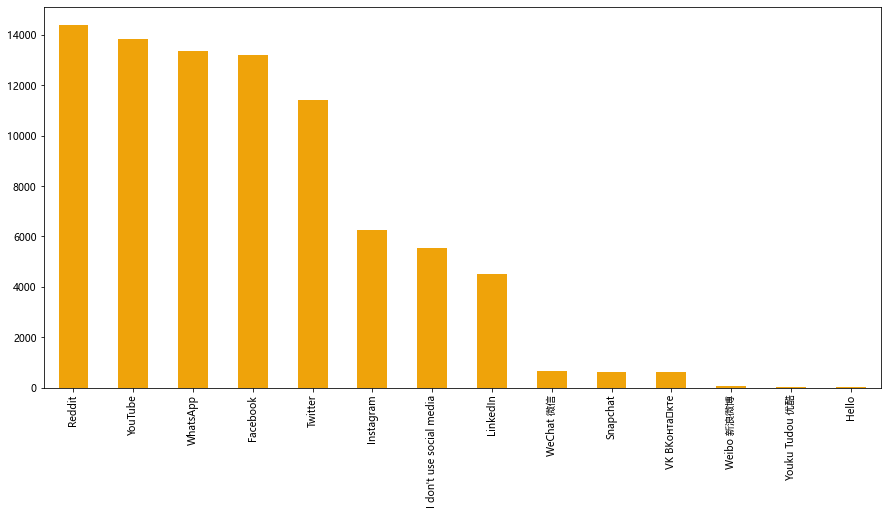

In [15]:
df['SocialMedia'].value_counts().plot(kind="bar", figsize=(15,7), color="#efa30a")

 ## <font color=red>分析多答案調查問題
-----
接著開始分析這個調查數據，看看有多少人員有在使用 Python。


顯示各人員使用過的程式語言

In [16]:
df["LanguageWorkedWith"].head()

0                HTML/CSS;Java;JavaScript;Python
1                            C++;HTML/CSS;Python
2                                       HTML/CSS
3                            C;C++;C#;Python;SQL
4    C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
Name: LanguageWorkedWith, dtype: object

選擇出字串中含有Python的資料，計算出佔有的比例。

In [17]:
python_bool = df["LanguageWorkedWith"].str.contains('Python')
python_bool.value_counts(normalize=True)

False    0.583837
True     0.416163
Name: LanguageWorkedWith, dtype: float64

利用分號來分割欄位，建立一個新的dataframe

In [18]:
lang_lists = df["LanguageWorkedWith"].str.split(';', expand=True)
lang_lists.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,HTML/CSS,Java,JavaScript,Python,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,C++,HTML/CSS,Python,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,HTML/CSS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,C,C++,C#,Python,SQL,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,C++,HTML/CSS,Java,JavaScript,Python,SQL,VBA,None,None,None,...,None,None,None,None,None,None,None,None,None,None


用df.stack()堆疊DataFrame，將每一列切割後再堆疊在一起，以利於計數。
再用value_counts()來統計每種語言被提及的總次數。

In [19]:
lang_lists.stack().value_counts()

JavaScript               59219
HTML/CSS                 55466
SQL                      47544
Python                   36443
Java                     35917
Bash/Shell/PowerShell    31991
C#                       27097
PHP                      23030
C++                      20524
TypeScript               18523
C                        18017
Other(s):                 7920
Ruby                      7331
Go                        7201
Assembly                  5833
Swift                     5744
Kotlin                    5620
R                         5048
VBA                       4781
Objective-C               4191
Scala                     3309
Rust                      2794
Dart                      1683
Elixir                    1260
Clojure                   1254
WebAssembly               1015
F#                         973
Erlang                     777
dtype: int64

資料視覺化

<AxesSubplot:>

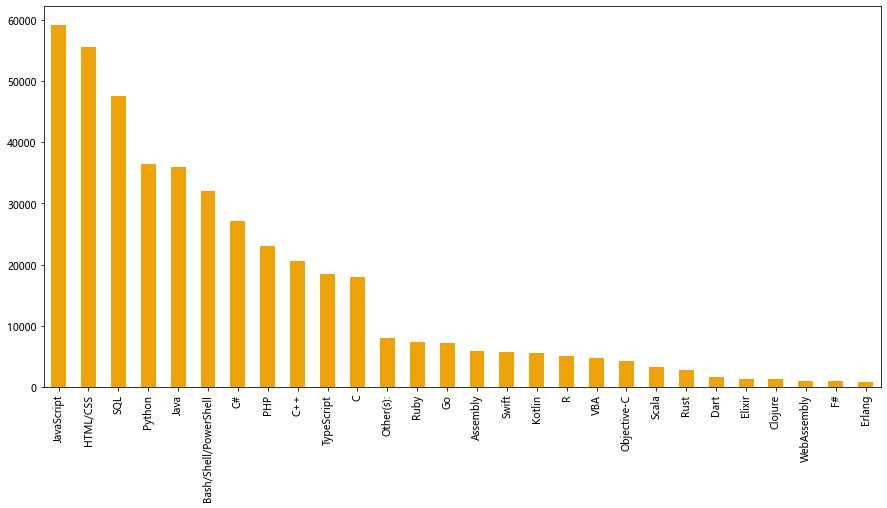

In [20]:
lang_lists.stack().value_counts().plot(kind='bar', figsize=(15,7), color="#efa30a")